#Logistic Regression using Python (scikit-learn)

# HeartDisease

Nome do aluno:

Referências:

https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Heart Disease Dataset

##Loading the Data


O código abaixo carregado o Dataset a partir de uma url.

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

header = ['AGE',
          'SEX',
          'CP',
          'TRESTBPS',
          'CHOL',
          'FBS',
          'RESTECG',
          'THALACH',
          'EXANG',
          'OLDPEAK',
          'SLOPE',
          'CA',
          'THAL',
          'DISEASE_NUM']

In [3]:
df_heart = pd.read_csv(url, names=header)
df_heart

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,DISEASE_NUM
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1



---

## Preparação dos Dados

Visto que o Dataset contém o caracter '?' (ao invés de do código 'NA' - *Not Available*) para indicar que a informação não estava disponível, algumas colunas não foram lidas como tipo ```float``` e sim como ```object```. É necessário fazer o tratamento apropriado destas colunas para transformá-las em numéricas.

Faça um código Python+ScikitLearn+Pandas+Numpy para:

1.    identificar em quais colunas isto ocorreu;
1.    substituir apropriadamente o código '?' pelo um código float ```NaN```;
1.    fazer o cast das respectivas colunas para float
1.    (*) trocar os NaN pela respectiva média da coluna



## Exercícios

Utilizando os conceitos visto nas aulas, implemente código em Python+ScikitLearn+Pandas+Numpy para:

    0) Preparar os dados: limpeza, transformação etc.
    1) Dividir os dados em Treinamento (70%) e Teste (30%)
    2) Treinar o modelo usando os dados de treinamento
    3) Calcular o Escore de Acurácia usando os dados de Teste
    4) Os passos 2 e 3 foram feitos sem normalização. Normalize os dados de Treinamento e repita os passos 2 e 3.
    5) Compare os escores de acurácia obtidos, em ambas as condições para treinamento, (**)teste e todos.
    6) (*) Pesquise e teste alguma forma de aumentar mais ainda a acurácia do modelo normalizado.
    7) A partir dos resultados do último classificador, calcule as métricas Recall, Precision, F1.
    8) Imprima a Matriz de confusão.
    9) Desenhe a Curva ROC.


In [4]:
df_heart.dtypes

AGE            float64
SEX            float64
CP             float64
TRESTBPS       float64
CHOL           float64
FBS            float64
RESTECG        float64
THALACH        float64
EXANG          float64
OLDPEAK        float64
SLOPE          float64
CA              object
THAL            object
DISEASE_NUM      int64
dtype: object

In [5]:
# Identificar colunas com valores '?'
fieldInt = df_heart.columns[df_heart.dtypes == 'object']
fieldInt

Index(['CA', 'THAL'], dtype='object')

In [6]:
# Substituir '?' por NaN
df_heart_replaced = df_heart
df_heart_replaced[fieldInt] = df_heart[fieldInt].replace('?', np.nan)
df_heart_replaced

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,DISEASE_NUM
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [7]:
# Converter colunas para tipo float
df_heart_converted = df_heart_replaced
df_heart_converted[fieldInt] = df_heart_replaced[fieldInt].astype(float)
df_heart_converted

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,DISEASE_NUM
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [8]:
# Preencher NaN com a média da coluna
df_heart_filled = df_heart_converted
for coluna in fieldInt:
    media_coluna = df_heart_converted[coluna].mean()
    df_heart_filled[coluna].fillna(media_coluna, inplace=True)
df_heart_filled

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,DISEASE_NUM
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.000000,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.000000,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.000000,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.000000,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0,1


In [9]:
# Dividir os dados em Treinamento (70%) e Teste (30%)
X = df_heart_filled.drop(columns=['DISEASE_NUM'])  # Recursos
y = df_heart_filled['DISEASE_NUM']  # Variável alvo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X.shape,y.shape, X_train.shape,y_train.shape, X_test.shape,y_test.shape

((303, 13), (303,), (212, 13), (212,), (91, 13), (91,))

In [10]:
# 2) Treinar o modelo usando os dados de treinamento
modelo = LogisticRegression(max_iter=20000)
modelo.fit(X_train, y_train)


LogisticRegression(max_iter=20000)

In [11]:
# 3) Calcular o Escore de Acurácia usando os dados de Teste
y_pred = modelo.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
print("Escore de Acurácia sem normalização:", acuracia)

print('Score (Train): ', modelo.score(X_train, y_train))
print('Score  (Test): ', modelo.score(X_test, y_test))



Escore de Acurácia sem normalização: 0.5604395604395604
Score (Train):  0.6886792452830188
Score  (Test):  0.5604395604395604


In [12]:
# 4) Normalizar os dados de Treinamento e repetir os passos 2 e 3
scaler = preprocessing.StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

modelo_norm = LogisticRegression()
modelo_norm.fit(X_train_norm, y_train)

y_pred_norm = modelo_norm.predict(X_test_norm)
acuracia_norm = accuracy_score(y_test, y_pred_norm)
print("Escore de Acurácia com normalização:", acuracia_norm)
print('Score (Train): ', modelo_norm.score(X_train_norm, y_train))
print('Score  (Test): ', modelo_norm.score(X_test_norm, y_test))



Escore de Acurácia com normalização: 0.5714285714285714
Score (Train):  0.6886792452830188
Score  (Test):  0.5714285714285714


In [13]:
# 5) Comparar os escores de acurácia
print("Comparação de escores de acurácia:")
print("Sem normalização:", acuracia)
print("Com normalização:", acuracia_norm)

Comparação de escores de acurácia:
Sem normalização: 0.5604395604395604
Com normalização: 0.5714285714285714


In [17]:
# 6) Aumentar a acurácia do modelo normalizado
# Aqui você pode tentar ajustar os hiperparâmetros do modelo, usar um modelo mais complexo,
# selecionar features mais relevantes, etc.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Passo 6: Ajustar hiperparâmetros para regressão logística
param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000]}

grid_search_logreg = GridSearchCV(LogisticRegression(max_iter=2000), param_grid_logreg, cv=5)
grid_search_logreg.fit(X_train_norm, y_train)

print("Melhor valor de C encontrado:", grid_search_logreg.best_params_['C'])

# Avaliar o desempenho
best_logreg = grid_search_logreg.best_estimator_
y_pred_test_logreg = best_logreg.predict(X_test_norm)
accuracy_test_logreg = accuracy_score(y_test, y_pred_test_logreg)
print("Acurácia no conjunto de teste com o melhor:", accuracy_test_logreg)

Melhor valor de C encontrado: 0.1
Acurácia no conjunto de teste com o melhor: 0.5714285714285714


In [18]:
# 7) Calcular Recall, Precision e F1
print("Métricas de classificação:")
print(classification_report(y_test, y_pred_norm))



Métricas de classificação:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        45
           1       0.25      0.27      0.26        11
           2       0.67      0.12      0.20        17
           3       0.21      0.36      0.27        11
           4       0.20      0.14      0.17         7

    accuracy                           0.57        91
   macro avg       0.43      0.37      0.35        91
weighted avg       0.60      0.57      0.54        91



In [19]:
# 8) Imprimir a Matriz de Confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_norm))



Matriz de Confusão:
[[42  1  0  2  0]
 [ 5  3  0  3  0]
 [ 3  3  2  6  3]
 [ 1  4  1  4  1]
 [ 1  1  0  4  1]]


In [20]:
# 9) Desenhar a Curva ROC
y_proba = modelo_norm.predict_proba(X_test_norm)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label='Curva ROC')
plt.plot([0, 1], [0, 1], linestyle='--', label='Aleatório')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend()
plt.show()

ValueError: multiclass format is not supported

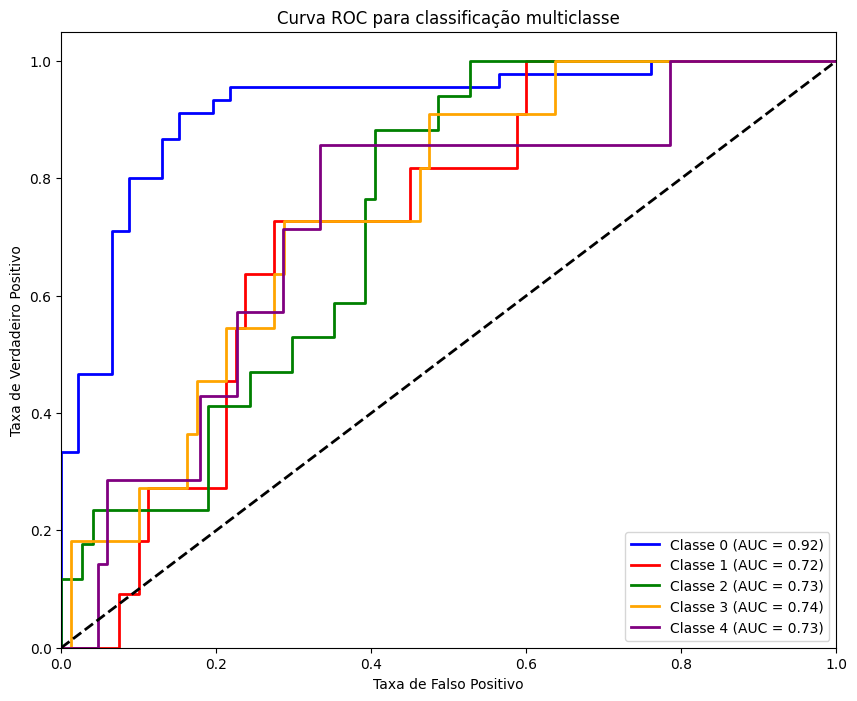

In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Calcular a curva ROC para cada classe
n_classes = len(np.unique(y_test))

y_proba = modelo_norm.predict_proba(X_test_norm)
# Binarizar as classes
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
# Calcular a curva ROC e a área sob a curva para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Plotar a curva ROC para cada classe
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Classe {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC para classificação multiclasse')
plt.legend(loc="lower right")
plt.show()